In [2]:
import uproot

filename = '500k/results-master.root'

file = uproot.open(filename)
ttree = file['Universal Ntuple']
data = ttree.arrays(["type", "xPos", "yPos", "zPos", "xDir", "yDir", "zDir", "len", "E"], library='pd')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485064 entries, 0 to 485063
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   type    485064 non-null  int32  
 1   xPos    485064 non-null  float64
 2   yPos    485064 non-null  float64
 3   zPos    485064 non-null  float64
 4   xDir    485064 non-null  float64
 5   yDir    485064 non-null  float64
 6   zDir    485064 non-null  float64
 7   len     485064 non-null  float64
 8   E       485064 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 31.5 MB


In [40]:
# 0 - нейтроны, 1 - гамма-кванты
n_data = data.loc[data['type'] == 0]
g_data = data.loc[data['type'] == 1]

In [131]:
n_data['E'].loc[n_data['E'] <  1e-8]

98        4.301455e-09
200       8.039478e-09
201       7.640892e-09
667       7.514359e-09
668       7.541985e-09
              ...     
484175    7.548124e-09
484180    7.884978e-09
484278    9.156338e-09
484308    3.546006e-09
484875    6.106006e-09
Name: E, Length: 4389, dtype: float64

In [6]:
# Параметры бака Tank 1:
# Цилиндр со стенкой толщиной 1 мм. от 32.5 до 32.6 см. Высота 90 см.
# 2 крышки толщиной 1 мм.
import math

V_cap = math.pi * 32.6**2 * 0.1 # cm3
V_wall = math.pi * (32.6**2 - 32.5**2) * 90 # cm3
V = V_cap + V_wall

In [94]:
def read_bins(filename):
    bins = []
    with open(filename) as file:
        for line in file:
            bins.append(float(line))
    return [bin*1e-6 for bin in bins]

def filter_bins(bins, min, max):
    return [b for b in bins if b >= min and b <= max]

In [121]:
# Посмотрим общий спектр нейтронов
import pandas as pd

neutron_bins = read_bins('neutron_bins.txt')
# neutron_bins

# n_data['E'].plot(weights=n_data['len'], kind='hist', xticks=neutron_bins, logy=True)

# import matplotlib.pyplot as plt

# plt.hist(n_data['E'], weights=n_data['len'], bins=neutron_bins, log=True)
# plt.show()


In [ ]:
import seaborn as sns

sns.set_theme()

ax = sns.histplot(
    x=n_data['E'],
    # log_scale=(True, False), 
    weights=n_data['len'], 
    bins=neutron_bins,
    # bins=50,
    stat='frequency', # count, frequency
    fill=True,
)

# histogram.set_ylim(1e-5, 1e+6)
ax.set_xlim(1e-9, 20)
ax.set_yscale('log')
ax.set_xscale('log')

In [175]:
# Отфильтруем нейтроны, которые пересекают дно "бочки" и направлены наружу
n_data_bottom = n_data.loc[n_data['zPos'] <= -450].loc[n_data['zDir'] < 0]
# print(n_data_bottom.info())
# n_data_bottom.tail()

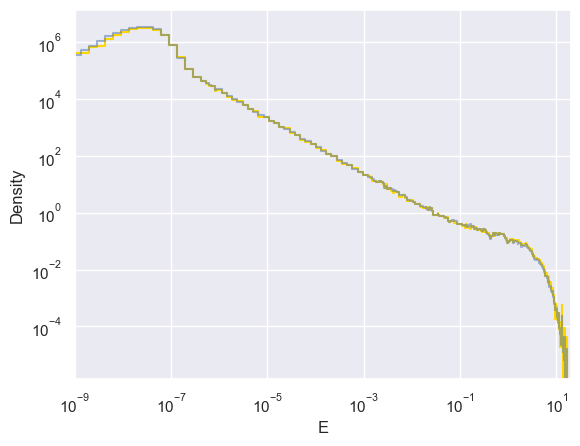

In [214]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


sns.histplot(
    x=n_data_bottom['E'],
    color='gold',
    # log_scale=(True, False), 
    weights=n_data_bottom['len'], 
    bins=neutron_bins,
    # bins=50,
    # stat='frequency', # count, frequency
    stat='density',
    # fill=False,
    alpha=1.0,
    ax=ax,
    element="step",
    fill=False,
)

sns.histplot(
    x=n_data['E'],
    # log_scale=(True, False), 
    weights=n_data['len'], 
    bins=neutron_bins,
    # bins=50,
    # stat='frequency', # count, frequency
    stat='density',
    # fill=False,
    alpha=0.5,
    ax=ax,
    element="step",
    fill=False,
)

# histogram.set_ylim(1e-5, 1e+6)
ax.set_xlim(1e-9, 20)
ax.set_yscale('log')
ax.set_xscale('log')

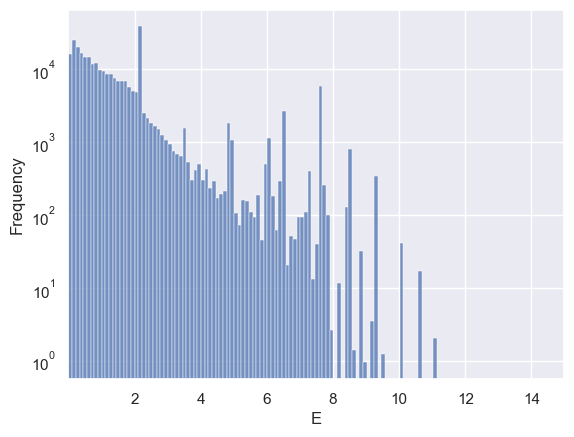

In [237]:
# gamma 
fig, ax = plt.subplots()

sns.histplot(
    x=g_data['E'],
    # color='green',
    # log_scale=(True, False), 
    weights=g_data['len'],
    # bins=neutron_bins,
    bins=100,
    stat='frequency', # count, frequency
    # stat='density',
    # fill=False,
    # alpha=1.0,
    ax=ax,
    # element="step",
    # fill=False,
)

ax.set_xlim(1e-5, 15)
# ax.set_xlim(1e-9, 20)
ax.set_yscale('log')
# ax.set_xscale('log')


In [235]:
gamma_peak = g_data.loc[g_data['E'] < 1e-2]
# gamma_peak = gamma_peak.loc[g_data['E'] < 2.23]
gamma_peak.tail()

,type,xPos,yPos,zPos,xDir,yDir,zDir,len,E
484100,1,-101.837993,110.568075,450.480760,-0.185703,-0.246967,0.951063,0.007064,0.006363
484415,1,-55.509905,236.979867,-450.067164,0.178148,-0.218272,-0.959490,0.002769,0.006363
484470,1,284.140102,157.847022,-319.038664,-0.721292,-0.406047,0.561128,0.004884,0.006363
484601,1,289.031117,149.468842,90.852850,-0.707818,0.700511,0.090984,0.000006,0.000721
485021,1,109.299713,-227.534926,-450.995293,-0.129404,-0.509448,0.850716,0.003334,0.006363
